In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import GaussianNoise

In [ ]:


train_datagen_aug =  ImageDataGenerator(width_shift_range=0.15,validation_split=0.15,
        height_shift_range=0.15, shear_range=0.15,
        rescale=1./255)

test_datagen_aug =  ImageDataGenerator(width_shift_range=0.15,
        height_shift_range=0.15,
        horizontal_flip=True,
        rescale=1./255)

train_data = train_datagen_aug.flow_from_directory(
       r'/content/drive/MyDrive/dataset-50/gaussian-50/train',
        target_size=(512,512),
        batch_size=50,subset ='training',
        class_mode='categorical')
valid_data = train_datagen_aug.flow_from_directory(
       r'/content/drive/MyDrive/dataset-50/gaussian-50/train',
        target_size=(512,512),
        batch_size=50,subset='validation',
        class_mode='categorical')


Found 3200 images belonging to 50 classes.
Found 550 images belonging to 50 classes.


In [ ]:
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import GaussianNoise
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (11,11), kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu', input_shape = (512,512,3)))
model.add(tf.keras.layers.Conv2D(filters = 48, kernel_size = (5,5), kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.0001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation = "relu", kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation = "relu", kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation = "relu", kernel_regularizer=l2(0.0001)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(50, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 8)       2912      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 48)      9648      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 128)     55424     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 192)     2

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("/content/drive/MyDrive/dataset-50/gaussian-50/gaussiannoise_50-augumentation_model_history_log.csv", append=True)
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#weight =model.save_weights('/content/drive/MyDrive/dataset-50/gaussian-50/gaussian-cnn_augu_dataset-50_weights.h5')
es1 = EarlyStopping( monitor='val_accuracy', patience=5, min_delta=0.001, mode='max')
mc = ModelCheckpoint('/content/drive/MyDrive/dataset-50/gaussian-50/gaussainnoise_50-augumentation_cnnmodel.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True,save_weights_only=True)

In [ ]:
import keras
adam = keras.optimizers.Adam(learning_rate = 0.01, decay = 0.9)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [6]:
history = model.fit(train_data, validation_data= valid_data,epochs = 300, callbacks = [csv_logger,es1,mc],shuffle =True )

Epoch 1/300
64/64 [==============================] - 357s 5s/step - loss: 10.8878 - accuracy: 0.1256 - val_loss: 158.3680 - val_accuracy: 0.0218

Epoch 00001: val_accuracy improved from -inf to 0.02182, saving model to /content/drive/MyDrive/dataset-50/gaussian-50/gaussainnoise_50-augumentation_cnnmodel.h5
Epoch 2/300
64/64 [==============================] - 351s 5s/step - loss: 10.5569 - accuracy: 0.2503 - val_loss: 87.5369 - val_accuracy: 0.0255

Epoch 00002: val_accuracy improved from 0.02182 to 0.02545, saving model to /content/drive/MyDrive/dataset-50/gaussian-50/gaussainnoise_50-augumentation_cnnmodel.h5
Epoch 3/300
64/64 [==============================] - 347s 5s/step - loss: 10.1634 - accuracy: 0.3316 - val_loss: 53.1822 - val_accuracy: 0.0455

Epoch 00003: val_accuracy improved from 0.02545 to 0.04545, saving model to /content/drive/MyDrive/dataset-50/gaussian-50/gaussainnoise_50-augumentation_cnnmodel.h5
Epoch 4/300
64/64 [==============================] - 339s 5s/step - loss

In [14]:
history = model.fit(train_data, validation_data= valid_data,epochs = 300, callbacks = [csv_logger,es1,mc],shuffle =True )

Epoch 1/300
64/64 [==============================] - 345s 5s/step - loss: 7.5820 - accuracy: 0.8666 - val_loss: 7.5023 - val_accuracy: 0.8873

Epoch 00001: val_accuracy improved from 0.88545 to 0.88727, saving model to /content/drive/MyDrive/dataset-50/gaussian-50/gaussainnoise_50-augumentation_cnnmodel.h5
Epoch 2/300
64/64 [==============================] - 336s 5s/step - loss: 7.5436 - accuracy: 0.8737 - val_loss: 7.4823 - val_accuracy: 0.9055

Epoch 00002: val_accuracy improved from 0.88727 to 0.90545, saving model to /content/drive/MyDrive/dataset-50/gaussian-50/gaussainnoise_50-augumentation_cnnmodel.h5
Epoch 3/300
64/64 [==============================] - 335s 5s/step - loss: 7.5067 - accuracy: 0.8797 - val_loss: 7.4305 - val_accuracy: 0.9018

Epoch 00003: val_accuracy did not improve from 0.90545
Epoch 4/300
64/64 [==============================] - 336s 5s/step - loss: 7.5057 - accuracy: 0.8709 - val_loss: 7.3759 - val_accuracy: 0.9218

Epoch 00004: val_accuracy improved from 0.9

In [22]:
model.save_weights('/content/drive/MyDrive/dataset-50/gaussian-50/gaussian-cnn_augu_dataset-50_weights.h5')

In [10]:

test_datagen_nor = ImageDataGenerator(rescale=1./255)

test_datagen_aug =  ImageDataGenerator(width_shift_range=0.15,
        height_shift_range=0.15, shear_range=0.15,
        rescale=1./255)

In [ ]:
## train and validation

In [15]:
train_acc=model.evaluate(train_data)
val_acc = model.evaluate(valid_data)
print("Train_Accuracy: %.2f%%" % (train_acc[1]*100))
print("valid_Accuracy: %.2f%%" % (val_acc[1]*100))

11/11 [==============================] - 50s 4s/step - loss: 7.0577 - accuracy: 0.9382
Train_Accuracy: 95.50%
valid_Accuracy: 93.82%


In [ ]:
## normal datset

In [17]:
test_genrator_nor = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-50/nor-dataset-50/test',
        target_size=(512,512),
        batch_size=50,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
26/26 [==============================] - 82s 3s/step - loss: 7.2827 - accuracy: 0.8369
Test_Accuracy: 83.69%


In [ ]:
##normal dataset augumentation

In [ ]:
test_genrator_gau_augmen = test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/dataset-50/nor-dataset-50/test',
        target_size=(720,720),
        batch_size=50,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau_augmen)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 67s 2s/step - loss: 2.3518 - accuracy: 0.9238
Test_Accuracy: 92.38%


In [ ]:
## gaussian noise

In [18]:
test_genrator_gau_nor = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-50/gaussian-50/test',
        target_size=(512,512),
        batch_size=64,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
21/21 [==============================] - 67s 3s/step - loss: 7.1155 - accuracy: 0.9446
Test_Accuracy: 94.46%


In [ ]:
## gaussian noise augumentation

In [19]:
test_genrator_gau_augmen = test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/dataset-50/gaussian-50/test',
        target_size=(512,512),
        batch_size=64,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau_augmen)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
21/21 [==============================] - 123s 6s/step - loss: 6.9726 - accuracy: 0.9438
Test_Accuracy: 94.38%


In [ ]:
## salt and pepper noise

In [20]:
test_genrator_salt = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-50/saltandpepper',
        target_size=(512,512),
        batch_size=80,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_salt)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 817s 51s/step - loss: 8.0232 - accuracy: 0.5769
Test_Accuracy: 57.69%


In [ ]:
## corrupted -20%

In [21]:
test_corrupted1= test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-50/corrupted-1/test',
        batch_size=32,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted1)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 455s 11s/step - loss: 37.0688 - accuracy: 0.0938
Test_Accuracy: 9.38%


In [ ]:
## corrupted-25%

In [23]:
test_corrupted2= test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-corrupted/corrupted-25/test',
        batch_size=80,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted2)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1050 images belonging to 50 classes.
14/14 [==============================] - 351s 27s/step - loss: 33.7823 - accuracy: 0.0829
Test_Accuracy: 8.29%


In [ ]:
## corrupted - 50%

In [24]:
test_corrupted2= test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-50/corrupted-2/test',
        batch_size=80,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted2)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 431s 27s/step - loss: 461.0183 - accuracy: 0.0200
Test_Accuracy: 2.00%


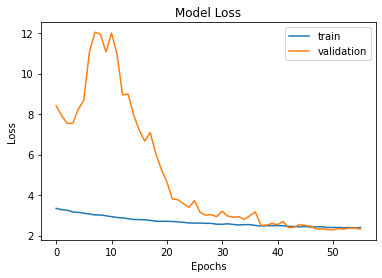

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/dataset-50/gaussian-50/cnn-gaussain-augu-50-loss.png')
plt.show()

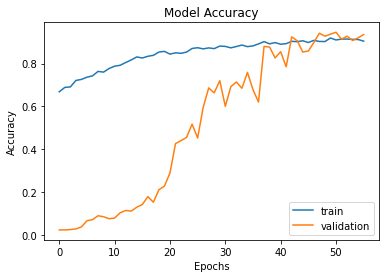

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/dataset-50/gaussian-50/cnn-gaussian-augu-50-accuracy.png')
plt.show()